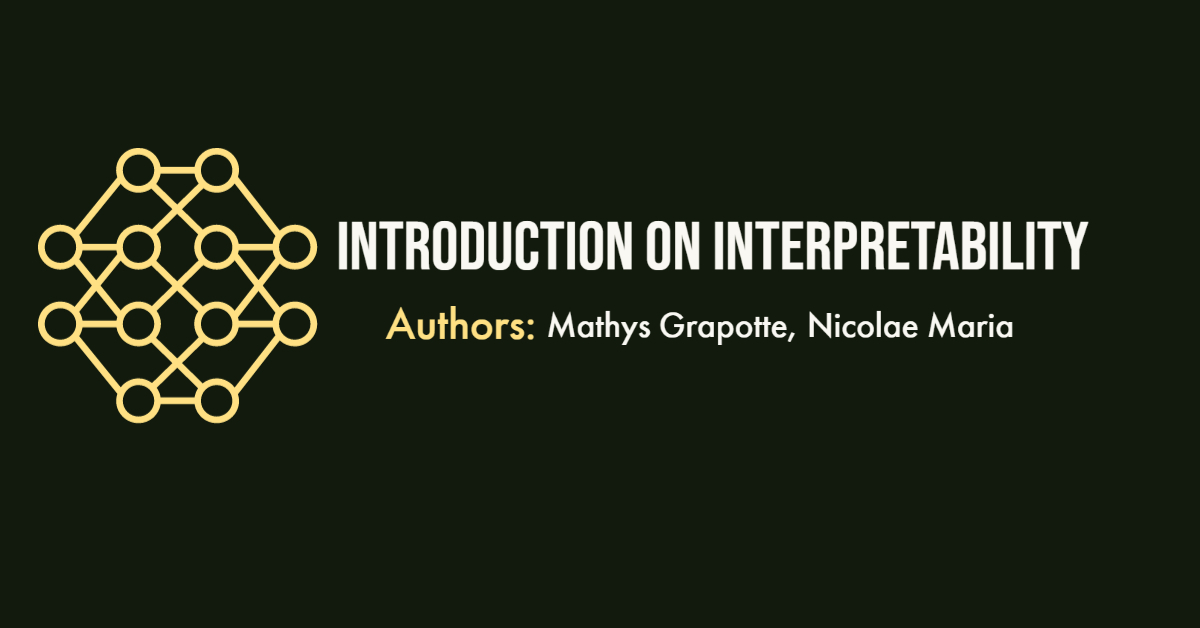

# Pytorch introduction

This section is intended for those who are beginners in Deep Learning with PyTorch. 
Here, we are going to learn about data loading in PyTorch, we are also going to learn about the basics of learning a deep learning model and saving it to the disk. Hopefully, after this section, you will have everything you need to move forward with PyTorch! 

If you are a complete beginner in machine learning, we suggest that you first get an intuition on how these methods work. For this, you can watch the excellent series by 3blue1brown on YouTube : https://www.youtube.com/watch?v=aircAruvnKk&t=162s

## What is PyTorch ? 

PyTorch is a Deep Learning framework that contains many useful functions and classes for learning a Deep Learning model. Deep Learning frameworks must meet the challenge of containing many useful, state of the art, and up to date Deep Learning methods while still being flexible enough to allow building new methods from existing ones. 

There are many Deep Learning frameworks, however, PyTorch is intuitive for those who are already familiar with Python as the project aimed to opperate in similar fashion to other popular Python librairies (such as Numpy).Therefore, we chose PyTorch for this tutorial. You can learn more about PyTorch here: https://pytorch.org/

### Importing libraries 

In [6]:
import torch 
import torchvision
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from torch import optim 
from torch.autograd import Variable
import matplotlib.pyplot as plt

from torch.utils.data import Subset

## Data processing 

In this section, we will talk about data processing, data downloading and an introduction on how data is organised in order to be fed to Neural Networks

For this tutorial, we will use the MNIST dataset. 
MNIST is a collection of images representing digits (0,1,2...9). 

Each image is labelled to the corresponding digit. A typicall task is to build a classifier that can associate each image with the correct digit. 


PyTorch has built in functions for downloading the data and to process it into PyTorch tensors (a data type that works like numpy arrays but can track gradients for model training) 

In [3]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=ToTensor())
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=ToTensor())

While training a model, we typically want to feed the model in “batches" of data during training. 
This allows us to speed up the process and to ensure that the model generalizes better since instead of learning one element by one element, the model learns by averaging groups (called batches) of elements. 
This increases robustness as outliers could disturb the training, however, if outliers are averaged with more conventional samples, this effect is minimized.


At the heart of PyTorch data loading utility is the **torch.utils.data.DataLoader** class. Dataloaders are convenient since they can be used to swiftly perform multiple data processing tasks while loading (such as cutting the data in batches and shuffling the data).

The snippet below has visualisation purposes (to get a good grasp of how our data actually looks like)


Feature batch shape: torch.Size([100, 1, 28, 28])
Labels batch shape: torch.Size([100])


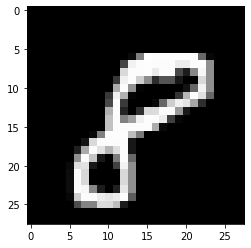

Label: 8
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,

In [6]:
# Loading the data, suffling and splitting it in batches
data_train = torch.utils.data.DataLoader(mnist_trainset, 
                                          batch_size=100, 
                                          shuffle=True,
                                          num_workers=1)

# We have loaded our MNIST dataset into the Dataloader object and can iterate through the dataset as needed
print(data_train)

train_features, train_labels = next(iter(data_train))  # iter() calls the __iter__() method on the data_train which returns an iterator
                                                       # next() then calls the __next__() method on that iterator to get the first iteration. 
                                                       # Running next() again will get the second item of the iterator, etc

print(f'Feature batch shape: {train_features.size()}')
print(f'Labels batch shape: {train_labels.size()}')


img = train_features[0].squeeze()
# torch.squeeze(input, dim=None, *, out=None) -> Returns a tensor with all the dimensions of input of size 1 removed.
# For example, if input is of shape:(A×1×B×C×1×D) then the out tensor will be of shape: (A×B×C×D).


label = train_labels[0]
plt.imshow(img, cmap = 'gray')
plt.show()
print(f'Label: {label}')
print(train_features)
print(train_labels)

Label of this image: 6


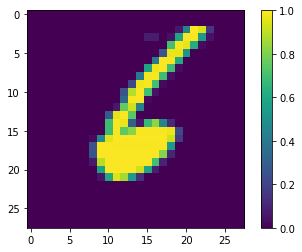

In [5]:
# The iter() function (which in turn calls the __iter__() method) returns an iterator from the object. 
# Iterators are objects that are commonly used in "for" loops (i.e., in for i in range(...), i is the iterator)
# We use the next() function to manually iterate through all the items of an iterator.
# When we reach the end and there is no more data to be returned, it will raise the StopIteration


it = iter(data_train)
first = next(it) # this will output a list with 2 elements, corresponding to the first batch
second = next(it) # this will output a list with 2 elements, corresponding to the second batch


print(f'Label of this image: {first[1][0].item()}')
# first[0][0] is the first image from the first batch
first[0][0].shape
first_ndarray = first[0][0].squeeze().numpy()
# numpy() function is the converter form torch.Tensor to numpy array.
plt.imshow(first_ndarray)
plt.colorbar()

**Don't get confused!!**

Our dataset is divided in smaller compartments called *batches*.

However, learning in batches once is not enough to learn an accurate representation of the data. Therefore, we need to learn in batches *multiple times*. Each time we see our whole dataset one time, we call that an *epoch*. 

Epochs and batches are different things, one can have many epochs and few large batches meaning that a lot of data is fed into the network for training at the same time, but this opperation is done  many times (the model "sees" the training dataset many times). One can also have few epochs and many batches, in this case the data is split into many small batches but this operation is done few times

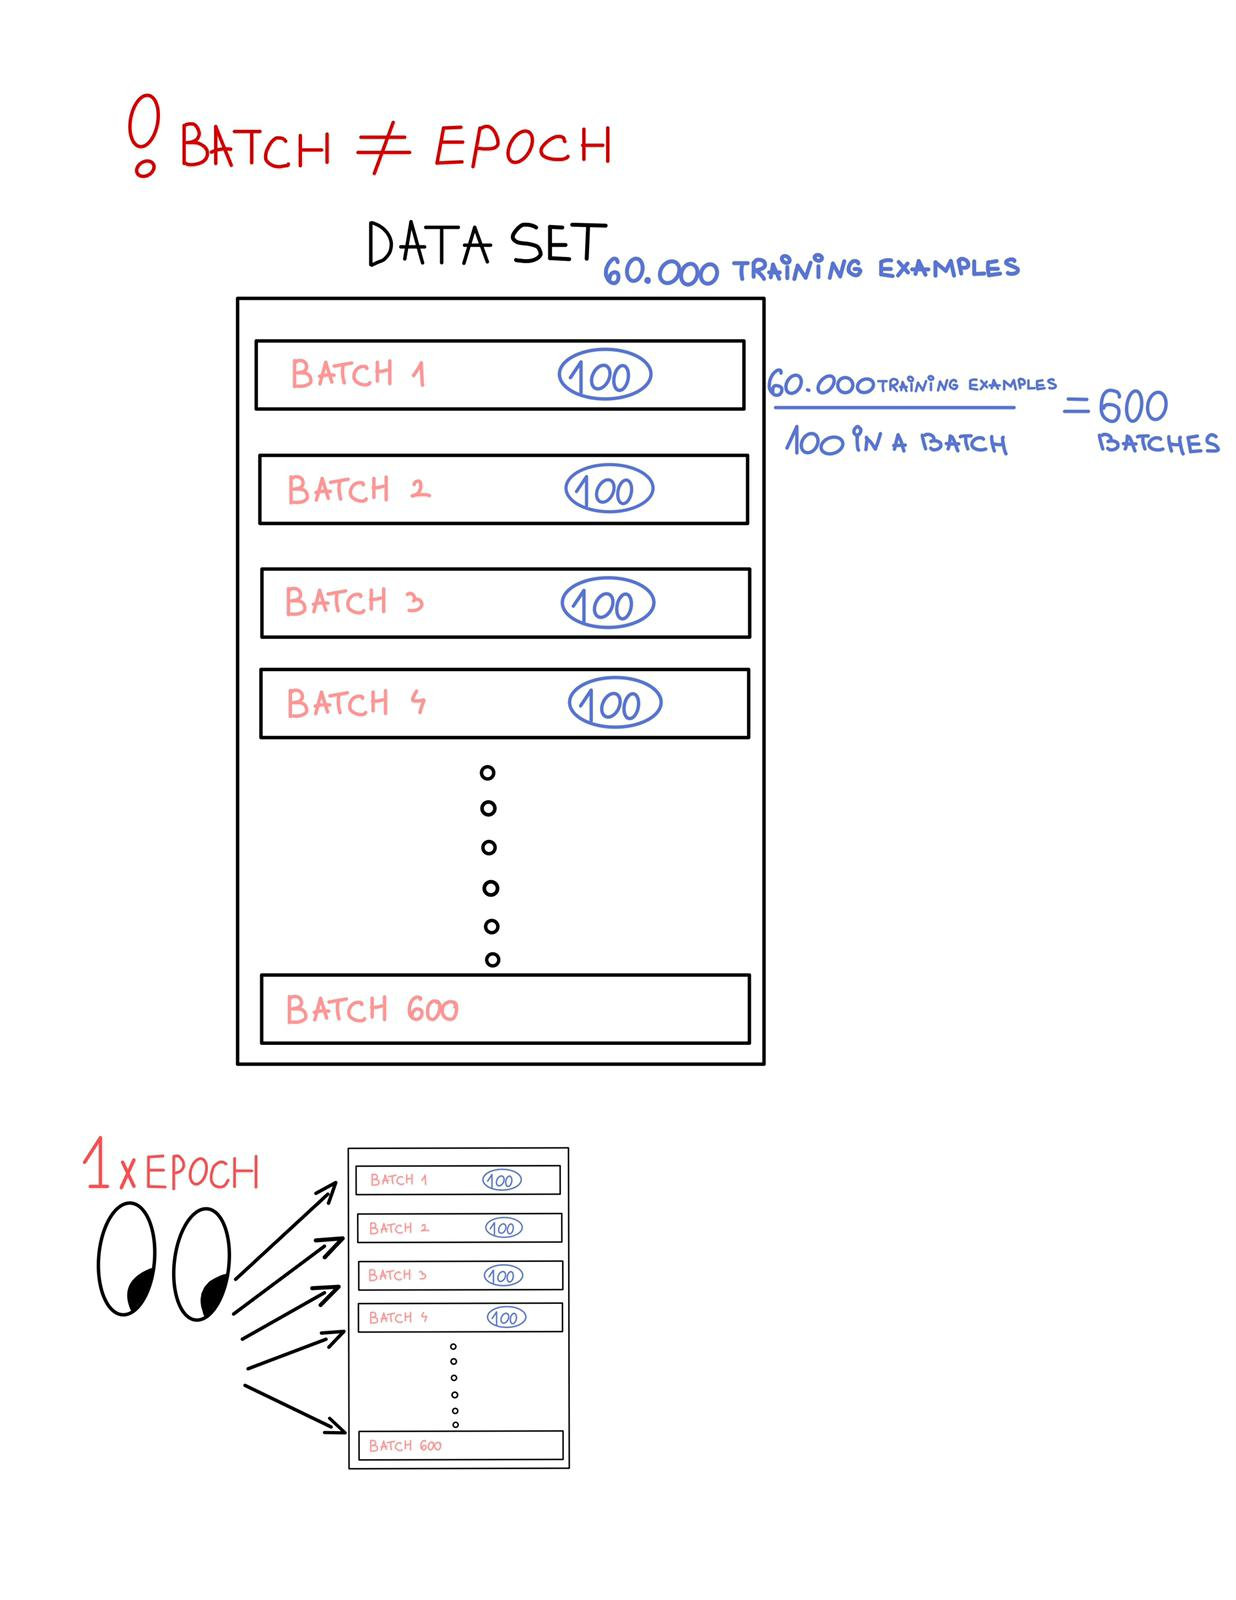

## MNIST: binary CNN implementation & training

In this introduction, we will work with a simple CNN trained on two classes of MNIST.
We will start by defining helper functions : 

In [8]:
def retrieve_indices(classes,dataset):
    
    '''
    retrieve_indices(classes,dataset)
    
    find indices in dataset that are of classes specified in classes
    arguments:
        classes (list): list of classes to look for in the dataset, as list of integers
        dataset (torch Dataset): a torch Dataset in which we search for (match targets to classes)
        
    returns: list of indices that belong to the desired classes
    ''' 
    
    
    class_indices=[i for i,label in enumerate(dataset.targets) if int(label) in classes] # label itself was a tensor :/
    return class_indices

def create_mnist_set(root,train,classes):
    
    '''
    create_mnist_set(root,train,classes)
    
    Create dataset from torchvision's MNIST data
    arguments:
        root (string): root directory to download files to/to look for files
        train (bool): whether work with pre-defined train- or testset
        classes (list): list of classes to include in the dataset, as list of integers
        
    returns the dataset defined by the above arguments
    '''
    
    mnist_trainset = datasets.MNIST(root=root, train=train, download=True, transform=lambda x: np.array(x))
    return Subset(mnist_trainset,retrieve_indices(classes,mnist_trainset))

class mnist_binary_cnn(nn.Module):

    def __init__(self,batch_transform=lambda x: (x/255.).reshape(-1,1,28,28), loss=nn.BCELoss()):
        super(mnist_binary_cnn,self).__init__()

        self.conv1=nn.Conv2d(in_channels=1,out_channels=10,kernel_size=4,stride=2)
        self.conv2=nn.Conv2d(in_channels=10,out_channels=20,kernel_size=3,stride=2)
        self.conv3=nn.Conv2d(in_channels=20,out_channels=10,kernel_size=2,stride=2)
        self.dense=nn.Linear(in_features=90,out_features=1)
        self.batch_transform=batch_transform
        self.loss=loss

    def forward(self,x):

        x=self.batch_transform(x) # eg. rescale
        x=F.relu(self.conv1(x))
        x=F.relu(self.conv2(x))
        x=F.relu(self.conv3(x))
        x=torch.flatten(x,start_dim=1)
        x=torch.sigmoid(self.dense(x))

        return x

    
def binarize_labels(labels,classes): # classes[0] becomes ~0, classes[1] ~1
    
    # the reason why we use it: NN outputs a single probability: need to binarize class labels

    return ((labels-classes[0])/(classes[1]-classes[0])).to(torch.float32)


def trainstep(model,optimizer,batch):
    
    # This function performs a single train-step of  a model
    

    labels=binarize_labels(batch[1],classes)

    optimizer.zero_grad()
    probs=model(batch[0])[:,0]

    loss=model.loss(probs,labels)

    loss.backward()
    optimizer.step()

    return loss.detach()


def accuracy(model,batch):
    
    # This function computes accuracy between a prediction vector and an observation vector

    n=batch[0].shape[0]
    
    labels=binarize_labels(batch[1],classes)
    probabilities=model(batch[0])[:,0]
    
    correct=0

    for i in range(n):
        if probabilities[i]>0.5 and labels[i]>0.5:
            correct+=1
        elif probabilities[i]<=0.5 and labels[i]<0.5:
            correct+=1
    return correct/n


In [7]:
classes=[1,8] # we'll work with these only!

trainset=create_mnist_set(root='./data',train=True,classes=classes)
testset=create_mnist_set(root='./data',train=False,classes=classes)

train_dataloader=DataLoader(trainset,batch_size=50,shuffle=True)
test_dataloader=DataLoader(testset,batch_size=50,shuffle=True)

Here, we define the model and an optimizer

In [10]:
model = mnist_binary_cnn() # standard choice to rescale image and crossentropy - see the defaults
optimizer = torch.optim.Adam(model.parameters(),lr=1e-4)

Here we perform the training

In [11]:
for i in range(10): # we have a simple problem, so we can train on 10 epochs only. 
    full_loss=0
    full_accuracy=0
    for j,batch in enumerate(train_dataloader):
        loss=trainstep(model,optimizer,batch)
        full_loss=full_loss*j/(j+1)+loss.detach()/(j+1) # compute average in a 'sliding' manner, maybe familiar from RL
        full_accuracy=full_accuracy*j/(j+1)+accuracy(model,batch)/(j+1)
    print('epoch %d completed'%(i+1))
    print('loss: %f' % (full_loss))
    print('accuracy: %f'%(full_accuracy))


epoch 1 completed
loss: 0.659604
accuracy: 0.776298
epoch 2 completed
loss: 0.346023
accuracy: 0.937765
epoch 3 completed
loss: 0.151130
accuracy: 0.949657
epoch 4 completed
loss: 0.109015
accuracy: 0.962263
epoch 5 completed
loss: 0.088381
accuracy: 0.968955
epoch 6 completed
loss: 0.074638
accuracy: 0.973730
epoch 7 completed
loss: 0.064782
accuracy: 0.977355
epoch 8 completed
loss: 0.057158
accuracy: 0.979749
epoch 9 completed
loss: 0.051302
accuracy: 0.982685
epoch 10 completed
loss: 0.046984
accuracy: 0.983968


Here we grab an unknown batch from the test data to validate our model

In [14]:
val_batch=next(iter(test_dataloader))

And here, we compute the accuracy of our model on said batch ! 

In [15]:
accuracy(model,val_batch)

0.98

## Model weights analysis and integrated gradients

Now that you have understood the basics, we will begin "interpretation by design" by creating a simple way to do by-design interpretation : a simple cnn-model. 

Typically, model weights are not readable by humans, since networks have many layers and the information gets mixed up within the weights of those layers. 

This is the reason why we are going to use an extremly simple Convolutional Neural Network in order to make the weights readable by ourselves. 


This tutorial aims at teaching you that complicated models are not always necessary and that sometimes, it is better to sacrifice a bit of performance to gain on insight. Building models with intepretation in mind from the get-go, is an important step towards fully interpretable deep learning.

### Model definition: 

We are going to use a simple CNN in order to make our predictions on the MNIST dataset


Our model has only one 5x5 filter that will extract features from the images, and then, these features are connected to a one layer neural net that is going to map each feature to a prediction. 

Each weight of that one layer neural net makes the link from a position in the image to a predictive class. Therefore, we can simply plot thoses weights as an image to get a feeling of where the model is looking at when it is predicting a class. 

Similarly, we can directly look at the 5x5 filter that is extracting features to gain insights. 


Let's start by building such a model and training it.


In [16]:
class CnnModel(nn.Module):
    def __init__(self):
        super(CnnModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 1, (5, 5), bias=True)
        self.flatt = nn.Flatten()
        self.dense1 = nn.Linear(576, 10)
        

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.flatt(x)
        x1 = self.dense1(x)
        return(F.softmax(x1, dim=1))
        

In [17]:
# We now instantiate an object (net) of the CnnModel class, net being our architecture 
net = CnnModel()

In [18]:
# Here we load the data

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=ToTensor())
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=ToTensor())


Data_train = torch.utils.data.DataLoader(mnist_trainset, 
                                          batch_size=100, 
                                          shuffle=True,
                                          num_workers=1)

#### Training loop

After loading the data, we can then train the model using this training loop

In [20]:
### First, we define the parameters
optimizer = optim.Adam(net.parameters(), lr = 0.01) 
loss_func = nn.CrossEntropyLoss()  
num_epochs = 10
total_step = len(Data_train) 

### Then we make 10 passes on the dataset (epochs)
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(Data_train):
        # In each pass, we retrieve the images and labels in the data
        b_x = Variable(images)   # images
        b_y = Variable(labels)   # labels
        
        # We then compute the output
        output = net(b_x)
        
        # And the loss function
        loss = loss_func(output, b_y)
        
        # Important to zero the gradients to not be influenced by the training in the last epoch
        optimizer.zero_grad()
        
        # Compute the gradient and optimize the network
        loss.backward() 
        optimizer.step()  
        
        # Let's plot the loss function value every 100 batches.
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))


Epoch [1/10], Step [100/600], Loss: 1.7187
Epoch [1/10], Step [200/600], Loss: 1.5961
Epoch [1/10], Step [300/600], Loss: 1.5927
Epoch [1/10], Step [400/600], Loss: 1.6507
Epoch [1/10], Step [500/600], Loss: 1.6487
Epoch [1/10], Step [600/600], Loss: 1.5864
Epoch [2/10], Step [100/600], Loss: 1.6228
Epoch [2/10], Step [200/600], Loss: 1.5833
Epoch [2/10], Step [300/600], Loss: 1.6258
Epoch [2/10], Step [400/600], Loss: 1.6827
Epoch [2/10], Step [500/600], Loss: 1.5787
Epoch [2/10], Step [600/600], Loss: 1.5538
Epoch [3/10], Step [100/600], Loss: 1.5600
Epoch [3/10], Step [200/600], Loss: 1.5820
Epoch [3/10], Step [300/600], Loss: 1.5778
Epoch [3/10], Step [400/600], Loss: 1.6246
Epoch [3/10], Step [500/600], Loss: 1.5943
Epoch [3/10], Step [600/600], Loss: 1.6532
Epoch [4/10], Step [100/600], Loss: 1.6018
Epoch [4/10], Step [200/600], Loss: 1.6521
Epoch [4/10], Step [300/600], Loss: 1.5621
Epoch [4/10], Step [400/600], Loss: 1.6034
Epoch [4/10], Step [500/600], Loss: 1.6568
Epoch [4/10

#### Testing

Once our model has been trained, we need to evaluate it's performance on the held out test data

In [21]:
Data_test = torch.utils.data.DataLoader(mnist_testset, 
                                          batch_size=100, 
                                          shuffle=True,
                                          num_workers=1)

In [22]:
# Let's begin our testing loop. 

net.eval() # our model needs to be in evaluation mode
test_loss = 0
correct = 0
test_losses = []


with torch.no_grad(): # We do not retrieve gradients in testing
    for images, labels in Data_test:
        
        # Similarly to the training loop, we retrieve images, and compute the outptu
        output = net(images)
        test_loss += loss_func(output, labels).item()
        pred = output.data.max(1, keepdim=True)[1]
        
        # We need to keep track of the correctly predicted samples as well as the loss function
        correct += pred.eq(labels.data.view_as(pred)).sum()
        test_loss /= len(Data_test.dataset)
        test_losses.append(test_loss)

print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct, 
        len(Data_test.dataset),100. * correct / len(Data_test.dataset)))


Test set: Avg. loss: 0.0002, Accuracy: 8572/10000 (86%)



#### Performance

Our model is arround 90% accurate at the task of classifying hand written diggits. While it is not state of the art, it is still enough to know that the model is learning something, which we are going to be able to analyze.

## Analysing the weights : 

Let's plot the weights of the network, this should allow us to understand "what" the model is learning and "how" it makes its predictions. 

Let's start with the convolution filter.

In [23]:
conv = net.conv1.weight.reshape(5,5).detach().numpy() # Let's fetch the convolution filter learned by the model

Text(0.5, 1.0, '5x5 Convolution filter learned by the model')

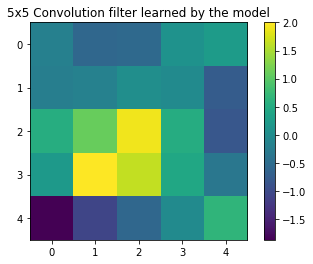

In [24]:
plt.imshow(conv) # Let's plot 
plt.colorbar()
plt.title("5x5 Convolution filter learned by the model")

Question : 

Can you analyse this convolution filter ? 

### Now, let's try to see how an input goes through the network. 

In [25]:
# define the input
first = next(iter(Data_test))
input1 = first[0][1].reshape(1, 1, 28, 28) # Change the second value to change the example

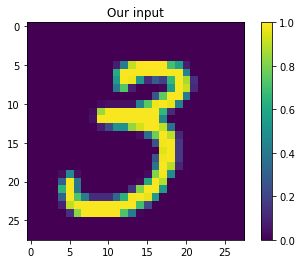

In [26]:

#first[0][0] is the first image from the first batch
first[0][1].shape # Change the second value to change the example
first_ndarray = first[0][1].squeeze().numpy()
# numpy() function is the converter form torch.Tensor to numpy array.
plt.title("Our input")
plt.imshow(first_ndarray)
plt.colorbar()

In [27]:
# Here we retrieve the output of the convolution layer from the input 
out_conv = net.conv1(input1).reshape(24,24).detach().numpy()

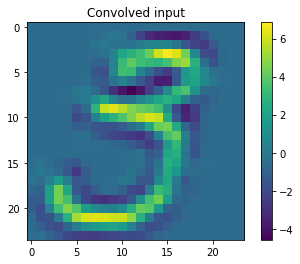

In [28]:
plt.title("Convolved input")
plt.imshow(out_conv)
plt.colorbar()

Question : 

Now, can you analyse what the 5x5 filter learned by the model does to the image ? For those who are familiar with images, are some Gaussian filter similar to the one learned by the model ? 

## Now let's try looking at the dense layer weights that follow the convolution

In [29]:
# Here we retrieve the weights of the Dense layer (related to the right class)
right_class = first[1][1].item() # Change the second value to change the example
w = net.dense1.weight[right_class].reshape(24,24).detach().numpy()

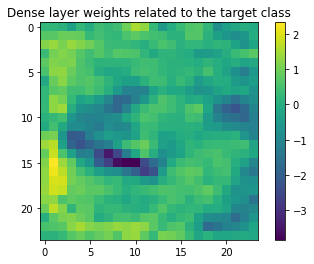

In [30]:
plt.title("Dense layer weights related to the target class")
plt.imshow(w)
plt.colorbar()

Question : 

Are those weight corresponding to the target class ? do you think that the model generalises well ? Is the model able to predict reversed images for instance ? 

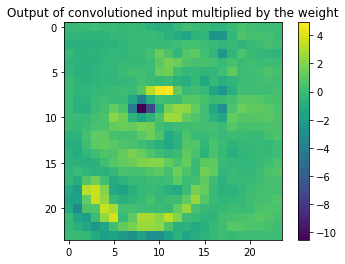

In [32]:
plt.title("Output of convolutioned input multiplied by the weight")
plt.imshow((out_conv*w))
plt.colorbar()

## Conclusion : 

We saw that our model learns a 5x5 filter that aims at improving contrast (if you look at the color bar of the figure showing input * convolution). Then, the models tries to learn a rough representation of the train set (we see that all 3's are oriented the same way). This rough representation acts as a similarity mask to predict a similarity value between the contrast-improved images and the dense-layer mask. 

Obviously, if we input an image that is significatively different from said mask, we will get poor results. 

We hope that this introduction to explainability motivated you to "do deep learning the hard way", meaning, building your models yourself, from scratch and in an interpretable way, which allows you to understand your model's pitfals and strenght. 

Don't hesitate to e-mail me at mathysgrapotte@gmail.com or reach me on slack/LinkedIn if you have any questions. 

We would advise you to read this press release if you would like to know more about the subject :

https://hdsr.mitpress.mit.edu/pub/f9kuryi8/release/7